<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day4/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 物体検知

## 鳥瞰図

広義の物体認識タスク

入力: 画像（カラー・モノクロは問わない）

|難易度|種別|出力|補足|
|:---|:---|:---|:---|
|易|
|│|分類(Classification)|（画像に対し単一または複数の）<br>クラスラベル|
|├--------|--------------------------------------------------------------|------------------------------------------------------>|物体の位置に興味なし|
|│|物体検知(Object Detection)|Bounding Box [bbox/BB]|
|│|意味領域分割(Semantic Segmentation)|（各ピクセルに対し単一の）<br>クラスラベル|
|├--------|--------------------------------------------------------------|------------------------------------------------------>|インスタンスの区別に興味なし|
|│|個体領域分割(Instance Segmantation)|（各ピクセルに対し単一の）<br>クラスラベル|
|難|

参考: https://engineering.matterport.com/splash-of-color-instance-segmentation-with-mask-r-cnn-and-tensorflow-7c761e238b46

## 代表的データセット

|データセット|クラス|Train+Val|Box/画像|画像サイズ|Instance Annotation|使用コンペ|
|---|---|---|---|---|---|---|
|VOC12|20|11,540|2.4|470x380|True|<h6>PASCAL VOC Object Detection Challenge</h6><ul><li>VOC = Visual Object Classes</li><li>主要貢献者が2012年に亡くなったことに伴いコンペも終了</li></ul>|
|ILSVRC17|200|476,668|1.1|500x400|False|<h6>ILSVRC Object Detection Challenge</h6><ul><li>コンペは2017年に終了（後継：Open Images Challenge）</li><li>ILSVRC = ImageNet Scale Visual Recognition Challenge</li><li>ImageNet（21,841クラス/1400万枚以上）のサブセット</li></ul>|
|MS COCO18|80|123,287|7.3|640x480|True|<h6>MS COCO Object Detection Challenge</h6><ul><li>COCO = Common Object in Context</li><li>物体位置推定に対する新たな評価指標を提案</li></ul>|
|OICOD18|500|1,743,042|7.0|一様ではない|True|<h6>Open Images Challenge Object Detection</h6><ul><li>ILSVRCやMS COCOとは異なるannotation process</li><li>Open Images V4（6000クラス以上/900万枚以上）のサブセット</li></ul>|

Box/画像が
- 小:アイコン的な映り、日常間とはかけ離れやすい
- 大: 部分的な重なり等も見られる、日常生活のコンテキストに近い

## IoU(Intersection over Union)

Motivation:
- 物体検出においてはクラスラベルだけでなく, 物体位置の予測精度も評価したい

Confusion Matrixの要素を用いて表現(Jaccard係数)：
$$
IoU=\frac{TP}{TP+FP+FN}
$$

分類問題の評価指標は[リンク](https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/machine_learning/logistic_regression.ipynb#scrollTo=lTvaLAx0DV03)参照

## mAP(mean Average Precision)

Average Precision:
- 厳密には各Recallのレベルに対して最大のPrecisionにスムージング
- 積分はInterpolated APとして有限点（e.g., 11点）で計算される
$$
AP=\int_0^1P(R)dR
$$和訳：PR曲線の下側面積

算術平均: クラス数がCのとき
$$
mAP=\frac{1}{C}\sum_{i=1}^CAP_i
$$

Appendix: MS COCOで導入された指標
- ここまで, IoU閾値は0.5で固定\
  ->0.5から0.95まで0.05刻みでAP＆mAPを計算し算術平均を計算
  $$
  mAP_{COCO}=\frac{mAP_{0.5}+mAP_{0.55}+\dots+mAP_{0.95}}{10}
  $$

## FPS(Flames per Second)

物体検知:\
応用上の要請から, 検出精度に加え検出速度も問題となる

参考:
- https://arxiv.org/abs/1906.05388
- https://arxiv.org/abs/1804.02767

## 物体検知の大枠

### マイルストーン: 深層学習以降の物体検知

2012
- AlexNetの登場を皮切りに, 時代はSIFTからDCNNへ
  - SIFT：Scale Invariant Feature Transform
    - 参考:[Object Recognition from Local Scale-Invariant Features](https://www.cs.ubc.ca/~lowe/papers/iccv99.pdf)
  - DCNN：Deep Convolutional Neural Network
    - 参考:[AlexNet](https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day2/latest_cnn.ipynb#scrollTo=S43Pb08Y8osN)

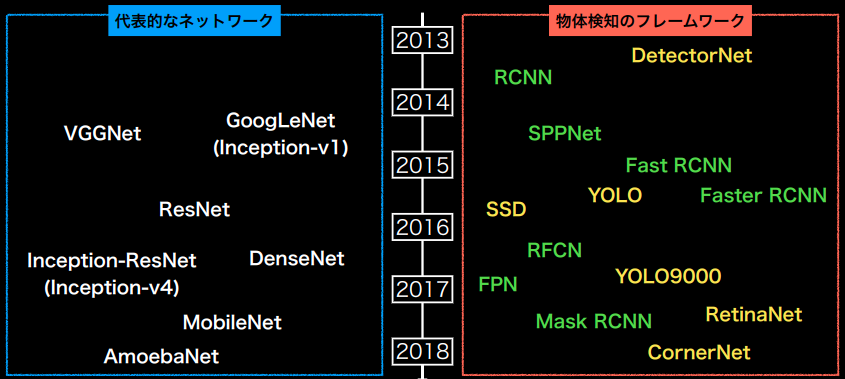

### 物体検知のフレームワーク

#### ２段階検出器（Two-stage detector）

該当フレームワーク:
- RCNN
- SPPNet
- Fast RCNN
- Faster RCNN
- RFCN
- FPN
- Mask RCNN etc...

特徴
- 候補領域の検出とクラス推定を別々に行う
- 相対的に精度が高い傾向
- 相対的に計算量が大きく推論も遅い傾向

#### １段階検出器（One-stage detector）

該当フレームワーク:
- DetectorNet
- YOLO
- SSD
- YOLO9000
- RetinaNet
- CornerNet etc...

特徴
- 候補領域の検出とクラス推定を同時に行う
- 相対的に精度が低い傾向
- 相対的に計算量が小さく推論も早い傾向

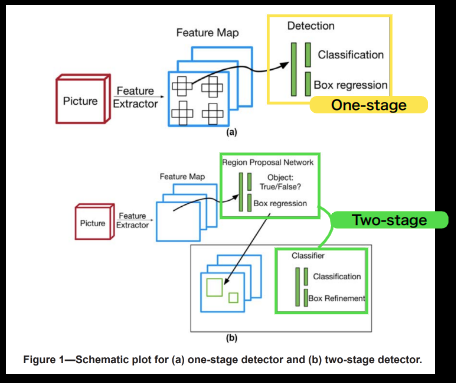

参考: https://www.researchgate.net/publication/332612704_Wellbore_Schematics_to_Structured_Data_Using_Artificial_Intelligence_Tools

## SSD(Single Shot Detector)


1. Default BOXを用意
2. Default BOXを変形し, conf.を出力


## ネットワークアーキテクチャ

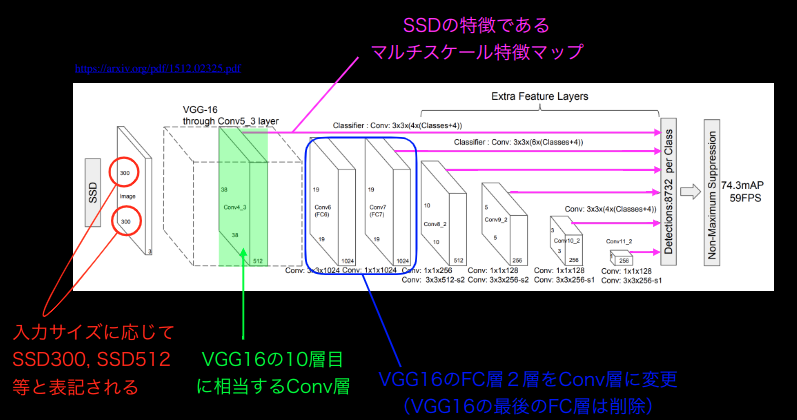

### 特徴マップからの出力

マップ中の１つの特徴量における１つのDefault Boxについて
- 出力サイズ: #Class + 4(オフセット項: $\Delta x, \Delta y,\Delta w,\Delta h$)
  - SSDにおけるオフセット項の注意
    - $x=x_0+0.1 * \Delta x * w_0$
    - $y=y_0+0.1 * \Delta x * f_0$
    - $w=w_0 * \exp(0.2 * \Delta w)$
    - $h=w_0 * \exp(0.2 * \Delta h)$

マップ中の各特徴量にk個のDefault Boxを用意するとき,
- 出力サイズ: k (#Class + 4)

\+ 特徴マップのサイズがm×nであるとすれば,
- 出力サイズ: k (#Class + 4) mn\
  ->特徴マップごとに 用意するDefault Box数

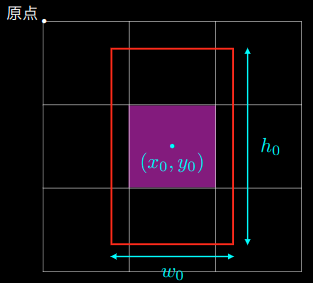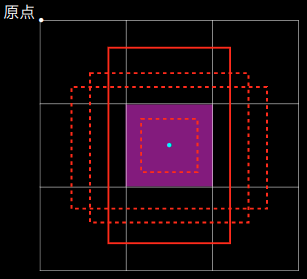

### デフォルトボックス数

VOCデータセットではクラス数20に背景クラスが考慮され, #Class = 21となることに注意して

4×(21+4)×38×38 + 4×(21+4)×3×3 + 4×(21+4)×1×1\
+\
6×(21+4)×19×19 + 6×(21+4)×10×10 + 6×(21+4)×5×5\
= 8,732 × (21+4)


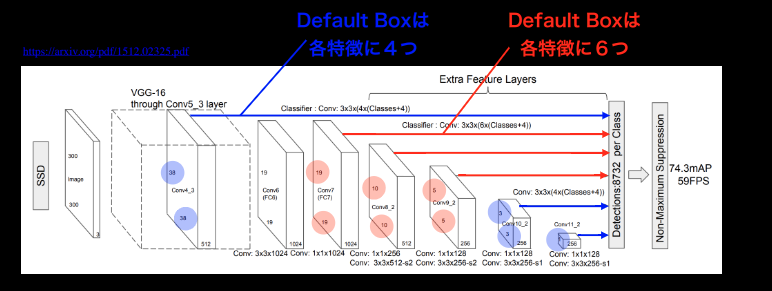

#### 多数のDefault Boxを用意したことで生ずる問題への対処

##### Non-Maximum Suppression

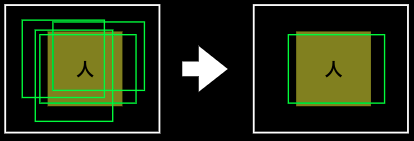

##### Hard Negative Mining

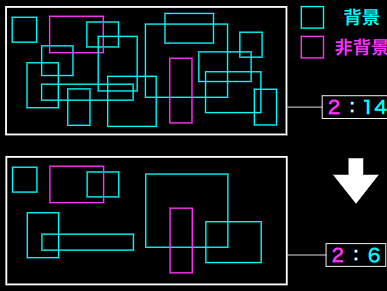

### 損失関数

$
L(x,c,l,g)=\frac{1}{N}(L_{conf}(x,c)+\alpha L_{loc}(x,l,g))
$

- $L_{conf}(x,c)$: confidenceに対する損失
  $$
  L_{conf}(x,c)=-\sum_{i \in Pos}^Nx_{ij}^p\log(\hat{c}_i^p)-\sum_{i \in Neg}\log(\hat{c}_i^p)~~where~~\hat{c}_i^p=\frac{\exp(c_i^p)}{\sum_p\exp(c_i^p)}
  $$
- $L_{loc}(x,l,g)$: 検出位置に対する損失confidenceに対する損失
  $$
  L_{loc}(x,l,g)=\sum_{i \in Pos}^N\sum_{m \in \{cx,cy,w,h\}}x_{ij}^ksmooth_{L1}(l_i^m-\hat{g}_j^m)\\
  \hat{g}_j^{cx}=(g_j^{cx}-d_i^{cx})/d_i^w~~~\hat{g}_j^{cy}=(g_j^{cy}-d_i^{cy})/d_i^h\\
  \hat{g}_j^{w}=\log\left(\frac{g_j^w}{d_i^w}\right)~~~\hat{g}_j^{h}=\log\left(\frac{g_j^h}{d_i^h}\right)
  $$
  - $smooth_{L1}(l_i^m-\hat{g}_j^m)$: Faster RCNNでも用いられる Smooth L1 loss


### SSD関連論文リンク

- [SSD: Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325)
- [DSSD : Deconvolutional Single Shot Detector](https://arxiv.org/abs/1701.06659)
- [Extend the shallow part of Single Shot MultiBox Detector via Convolutional Neural Network](https://arxiv.org/abs/1801.05918)
- [Single-Shot Refinement Neural Network for Object Detection](https://arxiv.org/abs/1711.06897)